<a href="https://colab.research.google.com/github/Satomiko/20Newsgroups/blob/main/subset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nltk

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB #for multinomialNB
from sklearn.metrics import accuracy_score, classification_report #for evaluation report


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
#after the review of text preprocessing method in "2. preprocessing methods.ipybb", the following function was created for text preprocessing

def preprocess_text(df, column_name):
    # Lowercasing
    df[column_name] = df[column_name].apply(lambda tokens: [token.lower() for token in tokens])

    # Stop Word Removal
    stop_words = set(stopwords.words('english'))
    df[column_name] = df[column_name].apply(lambda tokens: [word for word in tokens if word not in stop_words])

    # Removing one-letter words
    df[column_name] = df[column_name].apply(lambda tokens: [word for word in tokens if len(word) > 1])

    # Remove special symbols and punctuation
    df[column_name] = df[column_name].apply(lambda tokens: [word for word in tokens if word.isalpha()])

    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    df[column_name] = df[column_name].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [4]:
def word_count (df,colomn_name):
  df['word_count'] = df [colomn_name].apply(len)
  average_word_count = df['word_count'].mean()
  max_word_count = df['word_count'].max()
  minimum_word_count = df['word_count'].min()
  print(f"Average Word Count :{average_word_count}")
  print(f"Maximum Word Count :{max_word_count}")
  print(f"Minimum Word Count :{minimum_word_count}")


In [5]:
#use "fetch_20newsgroups" function from sklean.datasets  to load 20 newsgroups dataset
# removing "headers", "footers" and "quotes" is recommended because it is more realistic (https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html)
# loading dataset with or without "headers", "footers" and "quotes" and review each datasets.

remove = ("headers", "footers", "quotes")

cats1=['comp.graphics','talk.politics.mideast','soc.religion.christian','rec.autos','sci.crypt']  #from different primary group
cats2=['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','comp.windows.x'] #from same primary group


In [6]:
sub1_train = fetch_20newsgroups(subset='train', remove = remove, categories=cats1)
sub1_test = fetch_20newsgroups (subset='test', remove= remove, categories=cats1)

In [7]:
categories = sub1_train.target_names
categories

['comp.graphics',
 'rec.autos',
 'sci.crypt',
 'soc.religion.christian',
 'talk.politics.mideast']

In [8]:
len(sub1_train.data)

2936

In [9]:
len(sub1_test.data)

1955

In [10]:
#count observation in each category (Train Data)

cat,frequency_train = np.unique(sub1_train.target, return_counts = True)
cat,frequency_train

(array([0, 1, 2, 3, 4]), array([584, 594, 595, 599, 564]))

In [11]:
#count observation in each category (Test Data)

cat,frequency_test = np.unique(sub1_test.target, return_counts = True)
cat,frequency_test

(array([0, 1, 2, 3, 4]), array([389, 396, 396, 398, 376]))

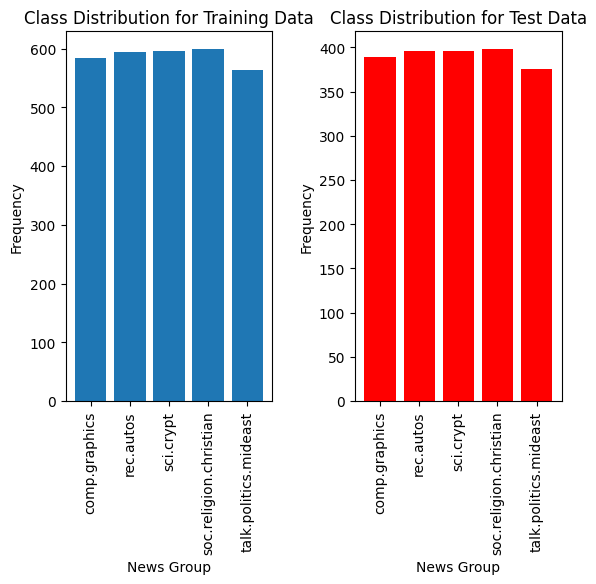

In [12]:
cat = np.array(sub1_test.target_names)
#create bar plots for both training data and test data to compare the distribution

#subplot 1 for training data distribution
plt.subplot(1,2,1) #1 row, 2 columns, position 1
plt.bar(cat, frequency_train)
plt.xticks(rotation=90)
plt.title('Class Distribution for Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')

#subplot 2 for test data distribution
plt.subplot(1,2,2) #1 row, 2 columns, position 2
plt.bar(cat, frequency_test, color = 'red')
plt.xticks(rotation=90)
plt.title('Class Distribution for Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace=0.4) #increase horisontal space
plt.show()

In [13]:
#Convert Bunch format to dataframe
train_df_1 = pd.DataFrame({'data': sub1_train.data, 'target': sub1_train.target})
test_df_1 = pd.DataFrame({'data': sub1_test.data, 'target': sub1_test.target})

In [14]:
#Tokenization
train_df_1 ['data'] = train_df_1['data'] .apply(word_tokenize)
test_df_1['data']= test_df_1 ['data']. apply(word_tokenize)

In [15]:
preprocess_text(train_df_1, 'data')
preprocess_text(test_df_1,'data')

In [16]:
# Remove rows with empty or whitespace strings in the "data" column
train_df_1 = train_df_1[train_df_1['data'].apply(len) > 0]
test_df_1 = test_df_1[test_df_1['data'].apply(len) > 0]

In [17]:
word_count(train_df_1,'data')

Average Word Count :115.4011934011934
Maximum Word Count :4777
Minimum Word Count :1


In [18]:
word_count(test_df_1,'data')

Average Word Count :119.35683987274655
Maximum Word Count :4714
Minimum Word Count :1


In [19]:
train_df_1.head()

,data,target,word_count
0,"[atrocity, report, horrify, azerbaijan, azeri,...",4,77
1,"[account, human, right, violation, azerbaijan,...",4,2524
2,"[anyone, know, good, shareware, animation, pai...",0,21
3,"[trying, avoid, discussion, whether, clinton, ...",4,21
4,"[far, know, isdn, call, swissnet, plugged, bit...",2,23


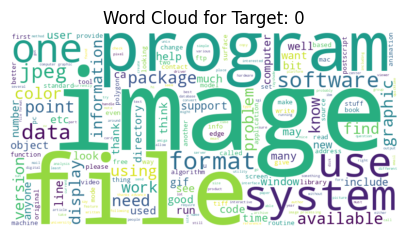

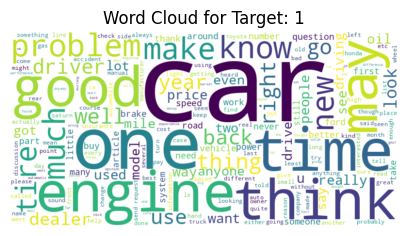

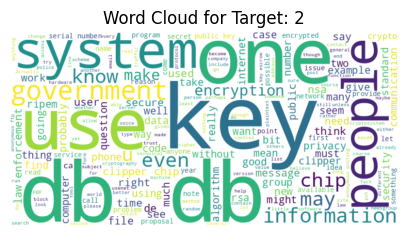

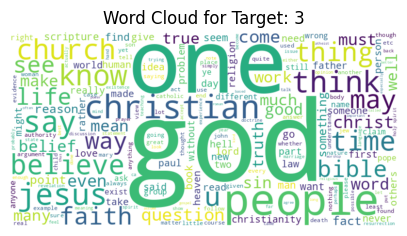

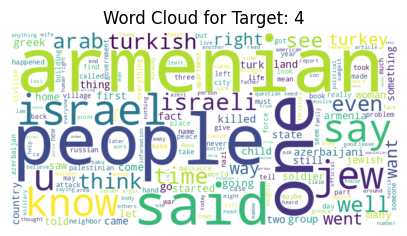

In [23]:
group_train_df_1 = train_df_1.groupby('target')

# Create a word cloud for each target
for target, group in group_train_df_1:
    # Combine the text data from the group into a single string
    combined_text = " ".join(group['data'].apply(lambda x: ' '.join(x)))

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    # Display the word cloud with the target as the title
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Target: {target}")
    plt.axis("off")
    plt.show()

In [ ]:
# TF-IDF

train_df_1['data'] = train_df_1['data'].apply(lambda tokens: ' '.join(tokens))
test_df_1['data'] =test_df_1['data'].apply(lambda tokens:' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X1_train = tfidf_vectorizer.fit_transform(train_df_1['data'])

X1_test = tfidf_vectorizer.transform(test_df_1['data'])

In [ ]:
print(X1_train.shape)

(2849, 5000)


In [ ]:
#for Multinomial NaiveBayes method, use "MultinomialNB" function fromsklearn.naive_bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X1_train, train_df_1['target'])

MultinomialNB()

In [24]:
# use "accuracy_score" and "classification_report" function from sklearn.metrics

predictions = nb_classifier.predict(X1_test)
accuracy = accuracy_score(test_df_1['target'], predictions)

report = classification_report(test_df_1['target'], predictions, target_names=sub1_train.target_names)
print(f'Accuracy: {accuracy}')
print(report)

NameError: ignored

In [25]:
sub2_train = fetch_20newsgroups(subset='train', remove = remove, categories=cats2)
sub2_test = fetch_20newsgroups (subset='test', remove= remove, categories=cats2)

In [26]:
categories = sub2_train.target_names
categories

['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x']

In [27]:
len(sub2_train.data)

2936

In [28]:
len(sub2_test.data)

1955

In [29]:
#count observation in each category (Train Data)

cat,frequency_train = np.unique(sub2_train.target, return_counts = True)
cat,frequency_train

(array([0, 1, 2, 3, 4]), array([584, 591, 590, 578, 593]))

In [30]:
#count observation in each category (Test Data)

cat,frequency_test = np.unique(sub2_test.target, return_counts = True)
cat,frequency_test

(array([0, 1, 2, 3, 4]), array([389, 394, 392, 385, 395]))

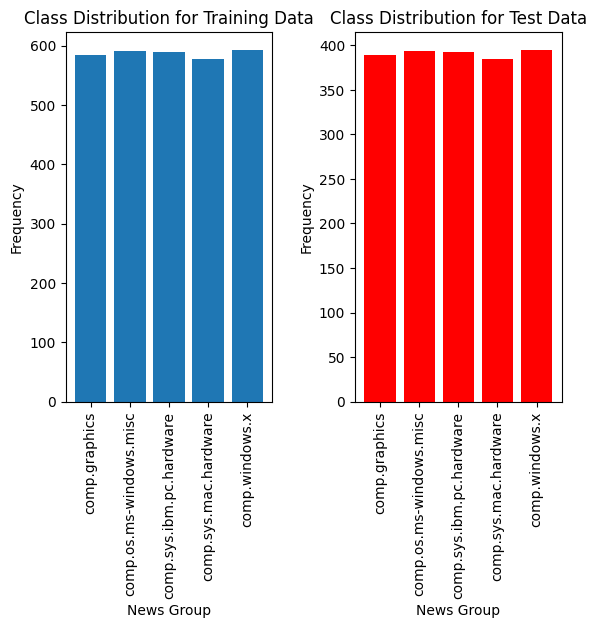

In [31]:
cat = np.array(sub2_test.target_names)
#create bar plots for both training data and test data to compare the distribution

#subplot 1 for training data distribution
plt.subplot(1,2,1) #1 row, 2 columns, position 1
plt.bar(cat, frequency_train)
plt.xticks(rotation=90)
plt.title('Class Distribution for Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')

#subplot 2 for test data distribution
plt.subplot(1,2,2) #1 row, 2 columns, position 2
plt.bar(cat, frequency_test, color = 'red')
plt.xticks(rotation=90)
plt.title('Class Distribution for Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace=0.4) #increase horisontal space
plt.show()

In [32]:
#Convert Bunch format to dataframe
train_df_2 = pd.DataFrame({'data': sub2_train.data, 'target': sub2_train.target})
test_df_2 = pd.DataFrame({'data': sub2_test.data, 'target': sub2_test.target})

In [33]:
#Tokenization
train_df_2 ['data'] = train_df_2['data'] .apply(word_tokenize)
test_df_2['data']= test_df_2 ['data']. apply(word_tokenize)

In [34]:
preprocess_text(train_df_2,'data')
preprocess_text(test_df_2,'data')

In [35]:
# Remove rows with empty or whitespace strings in the "data" column
train_df_2 = train_df_2[train_df_2['data'].apply(len) > 0]
test_df_2 = test_df_2[test_df_2['data'].apply(len) > 0]

In [36]:
print("[Train]")
word_count(train_df_2,'data')
print("[Test]")
word_count(test_df_2,'data')

[Train]
Average Word Count :80.59012950647532
Maximum Word Count :4890
Minimum Word Count :1
[Test]
Average Word Count :83.40335254059717
Maximum Word Count :4714
Minimum Word Count :1


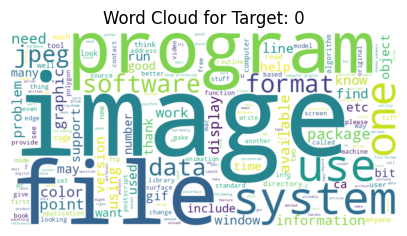

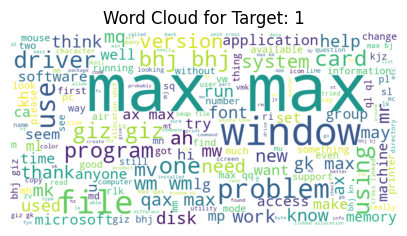

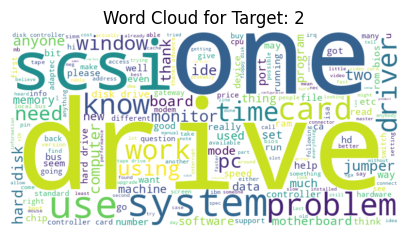

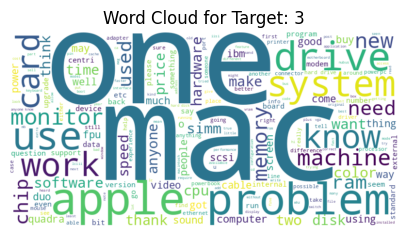

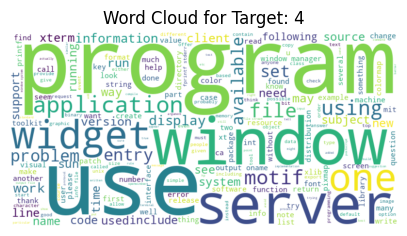

In [39]:
group_train_df_2 = train_df_2.groupby('target')

# Create a word cloud for each target
for target, group in group_train_df_2:
    # Combine the text data from the group into a single string
    combined_text = " ".join(group['data'].apply(lambda x: ' '.join(x)))

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    # Display the word cloud with the target as the title
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Target: {target}")
    plt.axis("off")
    plt.show()

In [ ]:
# TF-IDF

train_df_2['data'] = train_df_2['data'].apply(lambda tokens: ' '.join(tokens))
test_df_2['data'] =test_df_2['data'].apply(lambda tokens:' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X2_train = tfidf_vectorizer.fit_transform(train_df_2['data'])

X2_test = tfidf_vectorizer.transform(test_df_2['data'])

<ipython-input-165-248ea343cbfe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_2['data'] =test_df_2['data'].apply(lambda tokens:' '.join(tokens))


In [ ]:
#for Multinomial NaiveBayes method, use "MultinomialNB" function fromsklearn.naive_bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X2_train, train_df_2['target'])

MultinomialNB()

In [ ]:
# use "accuracy_score" and "classification_report" function from sklearn.metrics

predictions = nb_classifier.predict(X2_test)
accuracy = accuracy_score(test_df_2['target'], predictions)

report = classification_report(test_df_2['target'], predictions, target_names=sub2_train.target_names)
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.7163788592360021
                          precision    recall  f1-score   support

           comp.graphics       0.71      0.76      0.74       384
 comp.os.ms-windows.misc       0.71      0.60      0.65       379
comp.sys.ibm.pc.hardware       0.63      0.76      0.69       386
   comp.sys.mac.hardware       0.74      0.72      0.73       371
          comp.windows.x       0.81      0.74      0.77       391

                accuracy                           0.72      1911
               macro avg       0.72      0.72      0.72      1911
            weighted avg       0.72      0.72      0.72      1911

